In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
# This is the size of our encoded representations
encoding_dim = 28*28  

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


In [3]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)


In [4]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

<class 'numpy.ndarray'> (60000, 28, 28)
255 0


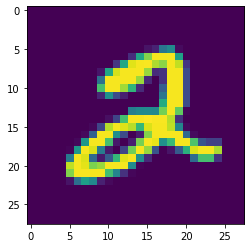

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()
print(type(x_train), np.shape(x_train))
plt.imshow(x_train[5])
print(np.max(x_train), np.min(x_train))

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(np.shape(x_train))
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2811 - val_loss: 0.1964
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1776 - val_loss: 0.1607
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1511 - val_loss: 0.1405
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1348 - val_loss: 0.1277
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1246 - val_loss: 0.1194
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1177 - val_loss: 0.1138
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1128 - val_loss: 0.1096
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1092 - val_loss: 0.1064
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1063 - val_loss: 0.1039
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1041 - val_loss: 0.1019

In [9]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

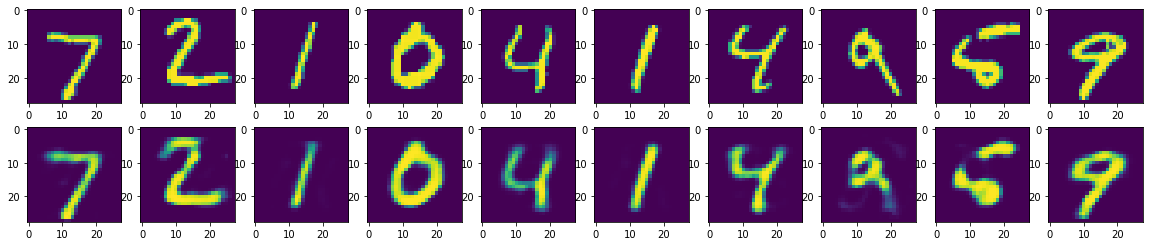

In [10]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
plt.show()


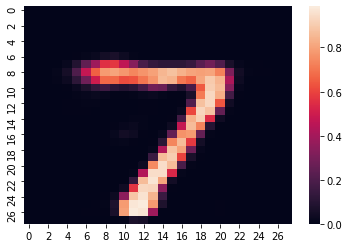

In [11]:
test = pd.DataFrame(decoded_imgs[0].reshape(28, 28))
sb.heatmap(test)